Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-10 00:18:56--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-10 00:18:56--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-10 00:18:56 (45.1 MB/s) - ‘

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')



Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

Customer ID: Identificador único por cliente

Gender: A que genero pertenece

Age: Cuantos años tiene

Annual Income: Cuanto recibe anualmente, en miles

Spending Score: Puntaje de gasto en el mall de 0 a 100



Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [11]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_1
0,1,19,15,39,False
1,2,21,15,81,False
2,3,20,16,6,True
3,4,23,16,77,True
4,5,31,17,40,True


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_1
0,1,19,15,39,False
1,2,21,15,81,False
2,3,20,16,6,True
3,4,23,16,77,True
4,5,31,17,40,True


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Es importante normalizar los datos antes de aplicar el algoritmo K-means porque este algoritmo se basa en la distancia entre los puntos de datos para formar los clusters.  Si las variables tienen diferentes escalas, las variables con valores más altos tendrán una mayor influencia en el cálculo de la distancia, lo que puede llevar a resultados sesgados.

La normalización consiste en transformar los datos para que tengan una media de 0 y una desviación estándar de 1. Esto asegura que todas las variables contribuyen por igual al cálculo de la distancia, independientemente de su escala original. El objetivo principal es que todas las variables tengan una escala comparable.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


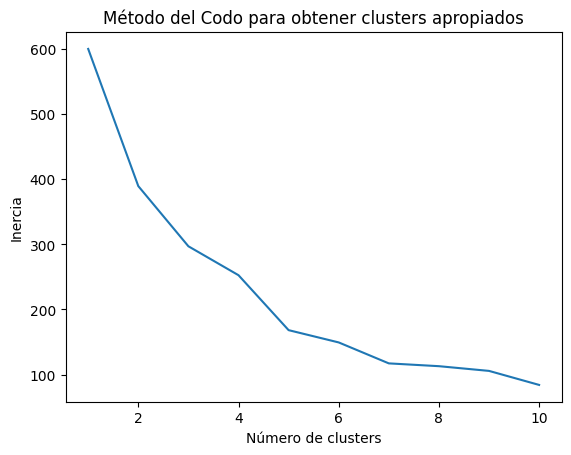

In [14]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para obtener clusters apropiados')
plt.show()



Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

El "codo" en la gráfica de inercia parece formarse alrededor de **5 o 6 clusters**.  Aunque hay una ligera disminución de la inercia después de 5, la reducción se vuelve menos pronunciada.  Por lo tanto, usar **5 clusters** sería una buena opción.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [19]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_1,Cluster
0,1,19,15,39,False,4
1,2,21,15,81,False,4
2,3,20,16,6,True,3
3,4,23,16,77,True,4
4,5,31,17,40,True,4


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

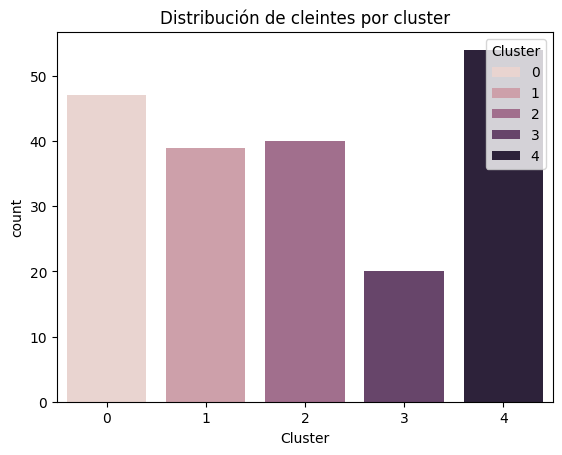

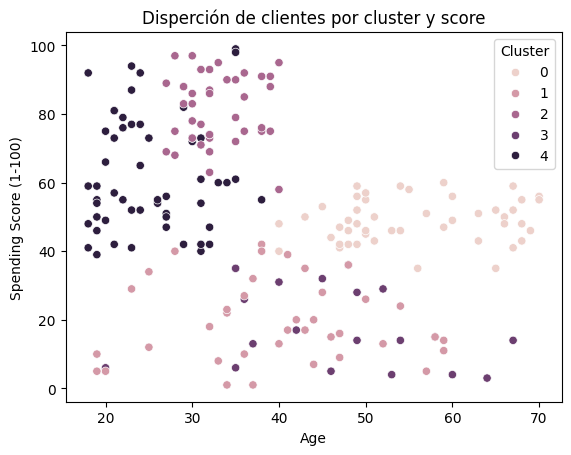

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
sns.countplot(data=data, x='Cluster', hue='Cluster', ax=ax1)
ax1.set_title('Distribución de cleintes por cluster')
fig2, ax2 = plt.subplots()
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Cluster', ax=ax2)
ax2.set_title('Disperción de clientes por cluster y score')
plt.show()

Podemos ver que la mayoria de nuestros clientes esta en nuestro cluster #4 que son personas jovenes que registran un spending score alto y las personas de mayor edad tienen un rango promedio similar de 40-60 spending score

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [29]:
cluster_description = data.groupby('Cluster').mean()
cluster_description

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_1
Cluster,,,,,
0,83.872340,55.638298,54.382979,48.851064,0.574468
1,159.743590,39.871795,86.102564,19.358974,0.487179
2,161.025000,32.875000,86.100000,81.525000,0.550000
3,24.100000,46.250000,26.750000,18.350000,0.600000
4,55.648148,25.185185,41.092593,62.240741,0.592593


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Las pricipales diferencias son en ingresos, nuestro cluster 1 y 2 tienen un promedio mucho mayor a los 3 clusters y en edad y puntaje de gasto esto nos da una clave de negocio vital, y es que podemos ver que las personas con promedio de **32 años** son las que **más ganan y más gastan, siendo nuestro público/mercado clave** en cambio las personas que pasan o rozan los 40 años y las personas menors a 25 años, no representan un gasto significativo

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

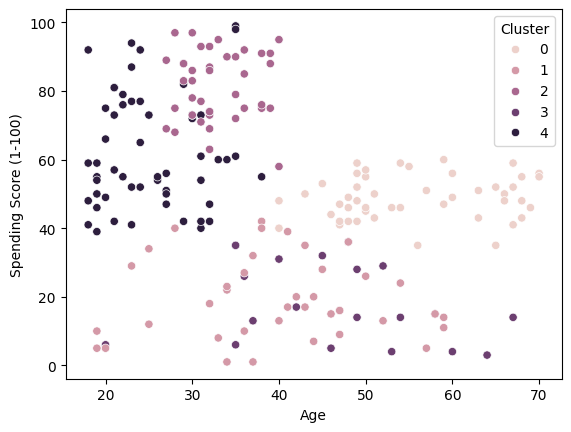

In [33]:
#misma gráfica en punto 4
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Cluster')
ax2.set_title('Disperción de clientes por cluster y score')
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

Si bien hay algunos outliers en cada cluster es bastante notoria la agrupación del cluster 4, 2 y 0 en terminos de edad y spending score, los otros dos están un poco más dispersos pero se logra identificar a simple vista esta agrupación


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

**Cluster 0**: "Mid-Age, Average Spenders"
Justificación: Este grupo parece estar compuesto por personas de mediana edad con puntajes de gasto e ingresos promedio.

**Cluster 1**: "High Income, Moderate Spenders"
Justificación: Se caracterizan por ingresos anuales más altos, pero un puntaje de gasto moderado. Pueden ser más cautelosos financieramente o tener diferentes prioridades de gasto.

**Cluster 2**: "High Earners, High Spenders"
Justificación: Este grupo muestra altos ingresos anuales y puntajes de gasto altos, lo que representa un mercado objetivo valioso. Es probable que sean importantes para las empresas.

**Cluster 3**: "Young Low Spenders"
Justificación: Predominantemente clientes jóvenes con puntajes de gasto e ingresos más bajos. Pueden ser estudiantes o quienes recién comienzan sus carreras.

**Cluster 4**: "Young High Spenders"
Justificación: Este grupo muestra un puntaje de gasto alto, pero ingresos relativamente más bajos, lo que podría indicar clientes más jóvenes que podrían estar usando crédito o tener diferentes patrones de gasto.
